In [2]:
#import packages
import tensorflow as ts
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
#import dataset
from keras.datasets import cifar10

In [4]:
# train and test the data
(xtrain,ytrain),(xtest,ytest)=cifar10.load_data()

In [5]:
#check type of the train and test
type(xtrain)

numpy.ndarray

In [6]:
#check shape of the train and test
xtrain.shape #RGB

(50000, 32, 32, 3)

In [7]:
ytrain.shape

(50000, 1)

In [9]:
#look a first image in array
xtrain[10]#0 to 255

array([[[53, 65, 53],
        [54, 63, 52],
        [56, 60, 50],
        ...,
        [47, 51, 50],
        [41, 45, 44],
        [24, 28, 27]],

       [[46, 59, 41],
        [53, 62, 45],
        [54, 59, 44],
        ...,
        [42, 46, 45],
        [39, 43, 42],
        [28, 32, 31]],

       [[45, 59, 38],
        [50, 60, 41],
        [46, 52, 34],
        ...,
        [38, 42, 41],
        [36, 40, 39],
        [29, 33, 32]],

       ...,

       [[71, 83, 66],
        [74, 83, 66],
        [80, 85, 67],
        ...,
        [51, 54, 33],
        [46, 49, 34],
        [49, 50, 41]],

       [[75, 82, 67],
        [79, 85, 69],
        [81, 85, 67],
        ...,
        [61, 65, 41],
        [64, 67, 48],
        [48, 50, 41]],

       [[85, 83, 71],
        [85, 84, 71],
        [86, 86, 70],
        ...,
        [61, 65, 39],
        [64, 67, 46],
        [49, 50, 41]]], dtype=uint8)

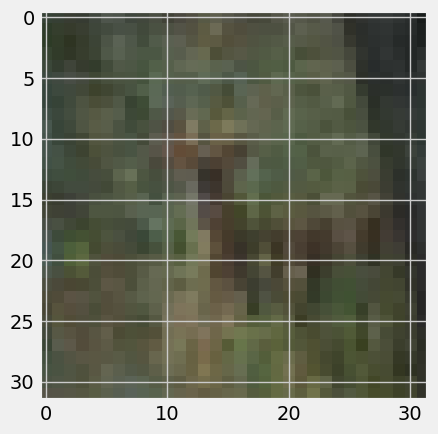

In [10]:
img0=plt.imshow(xtrain[10])

In [11]:
#get image label
lab1=ytrain[10]
print(lab1)

[4]


In [12]:
# Create One List
classification=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [13]:
print('image class is:',classification[ytrain[10][0]])

image class is: deer


In [14]:
#change the label into set of numbers [10]
ytrain_one_hot=to_categorical(ytrain)
ytest_one_hot=to_categorical(ytest)

In [15]:
ytest_one_hot  #000100000 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [16]:
print('one hot label:',ytrain_one_hot[10])

one hot label: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [8]:
#for x in xtrain:
    #print('______')

In [18]:
#normalize the pixels values
xtrain=xtrain/255
xtest=xtest/255

In [19]:
#create the architecture
model=Sequential()
#first conv layer
model.add(Conv2D(32,(5,5),activation='relu',input_shape=(32,32,3)))
#Pooling Layer
model.add(MaxPool2D(pool_size=(2,2)))
#second conv
model.add(Conv2D(32,(5,5),activation='relu'))
#Pooling Layer two
model.add(MaxPool2D(pool_size=(2,2)))

#flattening layer
model.add(Flatten())

#add a layer
model.add(Dense(1000,activation='relu'))
#add Dropout layer
model.add(Dropout(0.5))

#add a layer
model.add(Dense(500,activation='relu'))
#add Dropout layer
model.add(Dropout(0.5))


#add a layer
model.add(Dense(250,activation='relu'))


#add a layer
model.add(Dense(10,activation='softmax'))

C:\Users\aswin\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1000)           │       801,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 500)            │       500,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 250)            │       125,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,457,324 (5.56 MB)

 Trainable params: 1,457,324 (5.56 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [22]:
tr=model.fit(xtrain,ytrain_one_hot,batch_size=256,epochs=100,validation_split=0.2)

Epoch 1/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 31s 143ms/step - accuracy: 0.2442 - loss: 2.0063 - val_accuracy: 0.4320 - val_loss: 1.5325
Epoch 2/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 19s 119ms/step - accuracy: 0.4464 - loss: 1.5118 - val_accuracy: 0.5227 - val_loss: 1.3258
Epoch 3/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 18s 115ms/step - accuracy: 0.5149 - loss: 1.3366 - val_accuracy: 0.5615 - val_loss: 1.2247
Epoch 4/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 19s 121ms/step - accuracy: 0.5712 - loss: 1.1961 - val_accuracy: 0.5853 - val_loss: 1.1740
Epoch 5/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 19s 120ms/step - accuracy: 0.5970 - loss: 1.1286 - val_accuracy: 0.6157 - val_loss: 1.0843
Epoch 6/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 19s 122ms/step - accuracy: 0.6211 - loss: 1.0640 - val_accuracy: 0.6345 - val_loss: 1.0286
Epoch 7/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 19s 124ms/step - accuracy: 0.6468 - loss: 0.9963 - val_accuracy: 0.6298 - val_loss: 1.0340
Epoch 8/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 17s 108ms/step - accuracy: 0.6606 -

157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 128ms/step - accuracy: 0.9589 - loss: 0.1242 - val_accuracy: 0.6940 - val_loss: 1.4958
Epoch 100/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 18s 113ms/step - accuracy: 0.9555 - loss: 0.1297 - val_accuracy: 0.6844 - val_loss: 1.5055


In [23]:
model.evaluate(xtest,ytest_one_hot)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6792 - loss: 1.4953


[1.5096395015716553, 0.6793000102043152]

In [49]:
cat=plt.imread('bear_img.jpg')

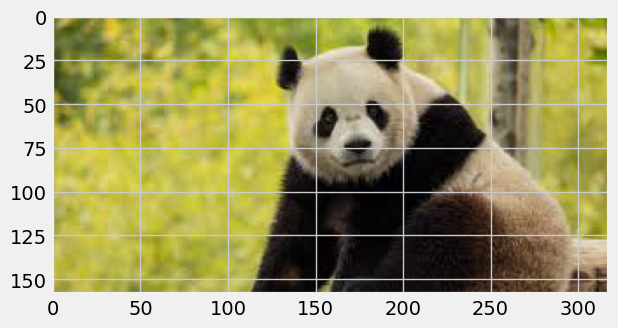

In [50]:
img=plt.imshow(cat)

In [54]:
#resize the image
#!pip install scikit-image
from skimage import transform

In [55]:
#!pip install scikit-image

In [56]:
resize=transform.resize(cat,(32,32,3))

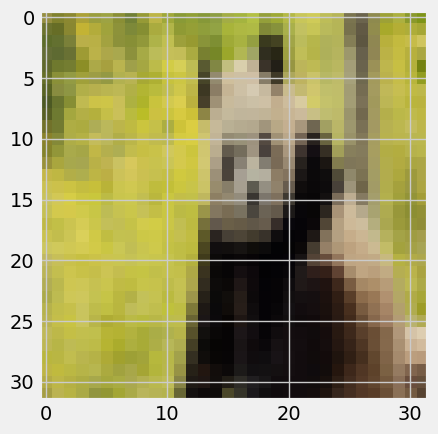

In [57]:
img=plt.imshow(resize)

In [58]:
prediction=model.predict(np.array([resize]))
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
[[1.8826444e-02 7.2806847e-06 9.6707582e-01 1.3012594e-02 1.4020650e-04
  1.9657833e-05 3.9066328e-04 3.9015009e-05 4.8643551e-04 1.8156203e-06]]


In [61]:
list_index=[0,1,2,3,4,5,6,7,8,9]
x=prediction
for i in range(10):
    for j in range(10):
        if x[0][list_index[i]]>x[0][list_index[j]]:
            temp=list_index[i]
            list_index[i]=list_index[j]
            list_index[j]=temp
print(list_index)

[2, 0, 3, 8, 6, 4, 7, 5, 1, 9]


In [62]:
# First Word is the Prediction Answer 
for i in range(5):
        print(classification[list_index[i]])

bird
airplane
cat
ship
frog
